In [1]:
# mahrukh khan Deep Learning
from keras.datasets import imdb
import numpy as np

The argument num_words=10000 means you’ll only keep the top 10,000 most fre-
quently occurring words in the training data. Rare words will be discarded. This allows

you to work with vector data of manageable size.

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [4]:
max(max(i) for i in train_data )
# Because you’re restricting yourself to the top 10,000 most frequent words, no word
# index will exceed 10,000

9999

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_train, x_test

(array([[0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        ...,
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.]]),
 array([[0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        ...,
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.]]))

In [7]:
len(x_train), len(x_test), len(test_labels), len(train_labels)

(25000, 25000, 25000, 25000)

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [9]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'])

Validation :

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [12]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
history = model.fit(partial_x_train,
      partial_y_train,
      epochs=20,
      batch_size=512,
      validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 9s 179ms/step - loss: 0.5277 - accuracy: 0.7743 - val_loss: 0.4065 - val_accuracy: 0.8629
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3213 - accuracy: 0.8955 - val_loss: 0.3448 - val_accuracy: 0.8619
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2400 - accuracy: 0.9202 - val_loss: 0.2972 - val_accuracy: 0.8820
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1934 - accuracy: 0.9372 - val_loss: 0.2740 - val_accuracy: 0.8909
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1612 - accuracy: 0.9473 - val_loss: 0.3004 - val_accuracy: 0.8803
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1370 - accuracy: 0.9544 - val_loss: 0.3283 - val_accuracy: 0.8731
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1159 - accuracy: 0.9642 - val_loss: 0.3112 - val_accuracy: 0.8821
Epoch 8/20
3

In [14]:
history_dict = history.history
history_dict

{'loss': [0.5277186632156372,
  0.32129359245300293,
  0.23996098339557648,
  0.19340486824512482,
  0.16119253635406494,
  0.13703911006450653,
  0.11590446531772614,
  0.10252130031585693,
  0.0864938348531723,
  0.07438044995069504,
  0.06664122641086578,
  0.05451347678899765,
  0.04893515631556511,
  0.03984088450670242,
  0.035439129918813705,
  0.03073931857943535,
  0.02572650834918022,
  0.02446638233959675,
  0.018647748976945877,
  0.01576213538646698],
 'accuracy': [0.7743333578109741,
  0.895466685295105,
  0.920199990272522,
  0.9372000098228455,
  0.9472666382789612,
  0.9544000029563904,
  0.9642000198364258,
  0.9681333303451538,
  0.9748666882514954,
  0.980733335018158,
  0.981333315372467,
  0.9868666529655457,
  0.9874666929244995,
  0.9909999966621399,
  0.9929999709129333,
  0.9936000108718872,
  0.9959333539009094,
  0.9955999851226807,
  0.9971333146095276,
  0.9982666373252869],
 'val_loss': [0.4065404534339905,
  0.3448370695114136,
  0.297195166349411,
  0.2

In [15]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

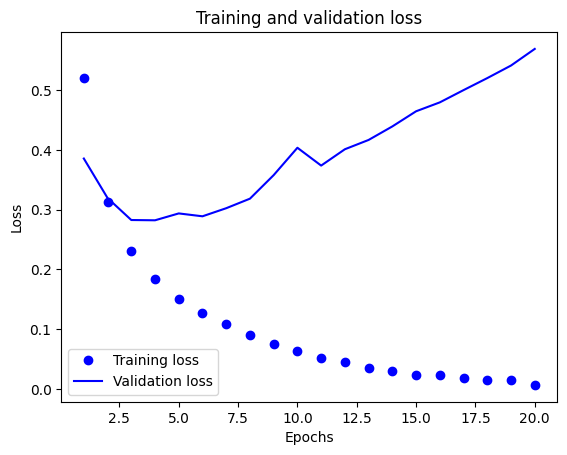

In [19]:
import matplotlib.pyplot as plt
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

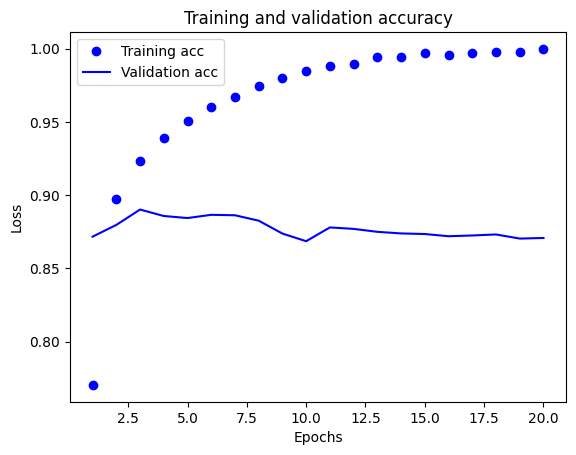

In [20]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

during the training of a neural network, the training loss decreases and the training accuracy increases with each epoch, as expected with gradient descent optimization. However, the validation loss and accuracy do not always follow the same trend, and may peak after a certain point, indicating overfitting. Overfitting occurs when the model learns patterns specific to the training data but fails to generalize to unseen data.

To prevent overfitting, you can stop training early, before the model starts overoptimizing on the training data. There are various techniques to mitigate overfitting, such as early stopping, regularization, and dropout. Early stopping involves monitoring the model's performance on the validation set and stopping the training when the performance starts to degrade. Other techniques like regularization and weight decay penalize model complexity to encourage simpler models that generalize better.

Retraining a model from scratch

In [16]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 16ms/step - loss: 0.4718 - accuracy: 0.8140
Epoch 2/4
49/49 [==============================] - 1s 17ms/step - loss: 0.2776 - accuracy: 0.9023
Epoch 3/4
49/49 [==============================] - 1s 16ms/step - loss: 0.2160 - accuracy: 0.9213
Epoch 4/4
782/782 [==============================] - 4s 3ms/step - loss: 0.2906 - accuracy: 0.8830


In [17]:
results

[0.2905820608139038, 0.8830400109291077]

In [18]:
model.predict(x_test)

782/782 [==============================] - 3s 3ms/step


array([[0.28895572],
       [0.9990752 ],
       [0.93865603],
       ...,
       [0.10510953],
       [0.06304152],
       [0.680356  ]], dtype=float32)

In [22]:
results = model.evaluate(test_data, verbose=2)

for name, value in zip(model.metrics_names, results):
  print("%s: %.3f" % (name, value))

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                160016    
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
